### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [61]:
import matplotlib.pyplot as plt
from importlib import reload
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [62]:
data = pd.read_csv('data/coupons.csv')

In [63]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [ ]:
nullData = data.isnull()
nullData.value_counts().to_csv('data/nullvalues.csv')
# It looks like null values are contained within columns 'car' to 'Restaurant20to50' So let's decide what to do with these values

3. Decide what to do about your missing data -- drop, replace, other...

In [65]:
# drop car column as most data here does not include any car information
data = data.query('car != "do not drive"')
data = data.drop('car', axis = 1)

#drop remaining rows with null values
data.dropna()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



In [66]:
data["Y"].value_counts()

Y
1    7200
0    5462
Name: count, dtype: int64

5. Use a bar plot to visualize the `coupon` column.

coupon
Coffee House             3989
Restaurant(<20)          2781
Carry out & Take away    2389
Bar                      2015
Restaurant(20-50)        1488
Name: count, dtype: int64


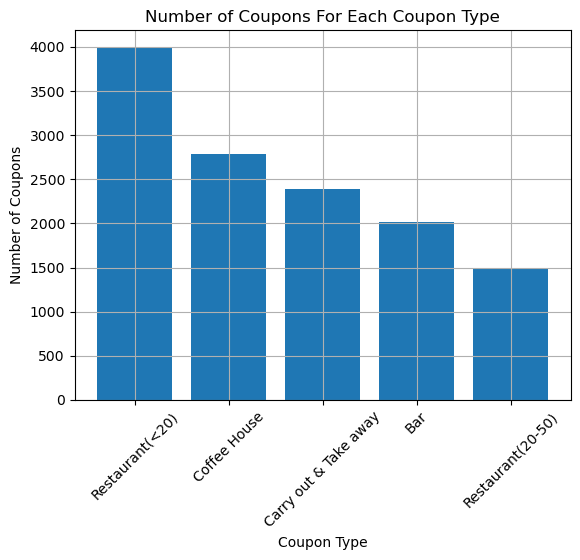

In [67]:
print(data["coupon"].value_counts())
reload(plt)
plt.bar(data["coupon"].unique(), data["coupon"].value_counts().values)
plt.title("Number of Coupons For Each Coupon Type")
plt.xlabel("Coupon Type")
plt.ylabel("Number of Coupons")
plt.grid(True)
plt.xticks(rotation = 45)
plt.savefig("images/Number of Coupons for Each Coupon Type.png")


6. Use a histogram to visualize the temperature column.

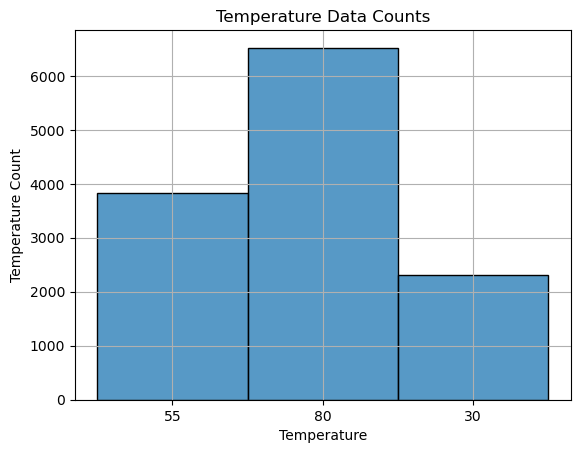

In [68]:
reload(plt)
sns.histplot(data['temperature'].astype(str))
plt.grid(True)
plt.title("Temperature Data Counts")
plt.xlabel("Temperature")
plt.ylabel("Temperature Count")
plt.savefig("images/Temperature Data Counts.png")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [69]:
barCoupons = data.loc[data['coupon'] == 'Bar']
barCoupons.head(20)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
61,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,1,0,1,0
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1


2. What proportion of bar coupons were accepted?


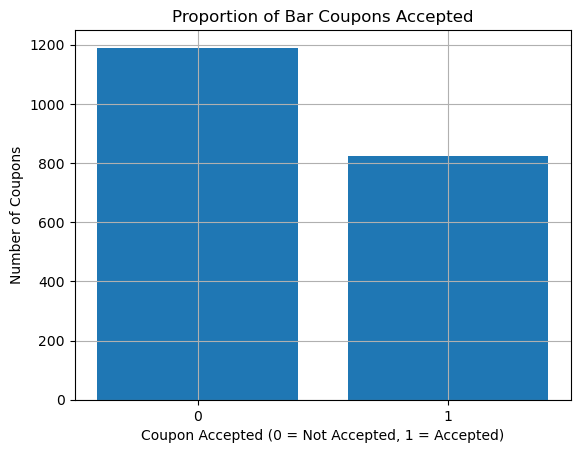

In [70]:
plt.bar(barCoupons['Y'].unique().astype(str), barCoupons['Y'].value_counts().values)
plt.grid(True)
plt.title("Proportion of Bar Coupons Accepted")
plt.xlabel("Coupon Accepted (0 = Not Accepted, 1 = Accepted)")
plt.ylabel("Number of Coupons")
plt.savefig("images/Bar Coupons Accepted.png")




3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [71]:
dataset3_1 = barCoupons.query('Bar == "less1" or Bar == "1~3"')
dataset3_2 = barCoupons.query('Bar == "4~8" or Bar == "gt8"')

acceptanceRate3orFewerTimes = dataset3_1['Y'].value_counts().values[0] / dataset3_1['Y'].size
acceptanceRateMoreThan3Times = dataset3_2['Y'].value_counts().values[0] / dataset3_2['Y'].size

print("The acceptance rate of those who went to a bar 3 or fewer times a month is: %0.2f percent" % (acceptanceRate3orFewerTimes * 100))
print("The acceptance rate of those who went to a bar more than 3 times a month a month is: %0.2f percent" % (acceptanceRateMoreThan3Times * 100))

The acceptance rate of those who went to a bar 3 or fewer times a month is: 52.74 percent
The acceptance rate of those who went to a bar more than 3 times a month a month is: 76.65 percent


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [72]:
over25 = ['26', '31', '50plus', '36', '41', '46']

barGreaterThan1 = barCoupons.query('Bar != "less1" and Bar != "never"')
dataset4_2 = barCoupons.query('Bar == "less1" or Bar == "never"')
dataset4_2 = dataset4_2.query('age == "21"') # excluding under 21 year olds from this study

dataset4_1 = barGreaterThan1.query("age == @over25")

acceptanceRateGreat1Under25 = dataset4_1['Y'].value_counts().values[0] / dataset4_1['Y'].size
acceptanceRateAllOthers =  dataset4_2['Y'].value_counts().values[0] / dataset4_2['Y'].size

print("The acceptance rate of those who are over 25, and go to a bar more than once a month is: %0.2f percent" % (acceptanceRateGreat1Under25 * 100))
print("The acceptance rate of all of the others is: %0.2f percent" % (acceptanceRateAllOthers * 100))





The acceptance rate of those who are over 25, and go to a bar more than once a month is: 68.04 percent
The acceptance rate of all of the others is: 61.20 percent


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [73]:
passengerType = ['Alone', 'Kid(s)']
dataset5_1 = barGreaterThan1.query('passanger != @passengerType and occupation != "Farming Fishing & Forestry"')
dataset5_2 = dataset4_2.query('passanger == @passengerType') 

acceptanceSelectedOccupationsPassengers = dataset5_1['Y'].value_counts().values[0] / dataset5_1['Y'].size
acceptanceRateAllOthers =  dataset5_2['Y'].value_counts().values[0] / dataset5_2['Y'].size

print("The acceptance rate of those who go to a bar more than once a month, had passengers who were not a kid, and had occupations other than farming, fishing or forestry is: %0.2f percent" % (acceptanceRateGreat1Under25 * 100))
print("The acceptance rate of all of the others is: %0.2f percent" % (acceptanceRateAllOthers * 100))


The acceptance rate of those who go to a bar more than once a month, had passengers who were not a kid, and had occupations other than farming, fishing or forestry is: 68.04 percent
The acceptance rate of all of the others is: 65.88 percent


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [74]:
dataset6_1 = barGreaterThan1.query('passanger != @passengerType and maritalStatus != "Widowed"')

over30 = ['31', '50plus', '36', '41', '46']
under25 = ['21', '26']
restaurantType = ['4~8', 'gt8']

dataset6_2 = barGreaterThan1.query('age == @over30')

dataset6_3 = barCoupons.query('RestaurantLessThan20 == @restaurantType')


acceptanceRate6_1 = dataset6_1['Y'].value_counts().values[0] / dataset6_1['Y'].size
acceptanceRate6_2 = dataset6_2['Y'].value_counts().values[0] / dataset6_2['Y'].size
acceptanceRate6_3 = dataset6_3['Y'].value_counts().values[0] / dataset6_3['Y'].size
acceptanceRateAllOthers =  dataset5_1['Y'].value_counts().values[0] / dataset5_1['Y'].size

print("The acceptance rate of those who go to a bar more than once a month, had passengers who were not a kid, and were not widowed is: %0.2f percent" % (acceptanceRate6_1 * 100))
print("The acceptance rate of those who go to bars more than once a month, and are under the age of 30 is: %0.2f percent" % (acceptanceRate6_2 * 100))
print("The acceptance rate of those who go to cheap restaurants more than 4 times a month, and income is less than 50K is: %0.2f percent" % (acceptanceRate6_3 * 100))

The acceptance rate of those who go to a bar more than once a month, had passengers who were not a kid, and were not widowed is: 70.59 percent
The acceptance rate of those who go to bars more than once a month, and are under the age of 30 is: 61.94 percent
The acceptance rate of those who go to cheap restaurants more than 4 times a month, and income is less than 50K is: 56.63 percent


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [75]:
print("There are a number of observations from the data provided:")
print("1. Those who went to bars more than once a month are 24 percent more likely to accept coupons. ")
print("2. Folks who are 25 years old and go to bars more often are 7 percentage points more likely to accept coupons. ")
print("3. Folks who didn't have kids, worked in industries  ")
print("4. Folks who are lower income and go to cheap restaurants frequently are less likely to accept bar coupons")
print("5. Folks who not widowed have a lower likelihood of accepting bar coupons even though they were sampled with folks going to the bar more than once a month")

There are a number of observations from the data provided:
1. Those who went to bars more than once a month are 24 percent more likely to accept coupons. 
2. Folks who are 25 years old and go to bars more often are 7 percentage points more likely to accept coupons. 
3. Folks who didn't have kids, worked in industries  
4. Folks who are lower income and go to cheap restaurants frequently are less likely to accept bar coupons
5. Folks who not widowed have a lower likelihood of accepting bar coupons even though they were sampled with folks going to the bar more than once a month


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. I am choosing to work with the Restaurant(<20) Coupons. The first step is visualizing the income data for this group. 

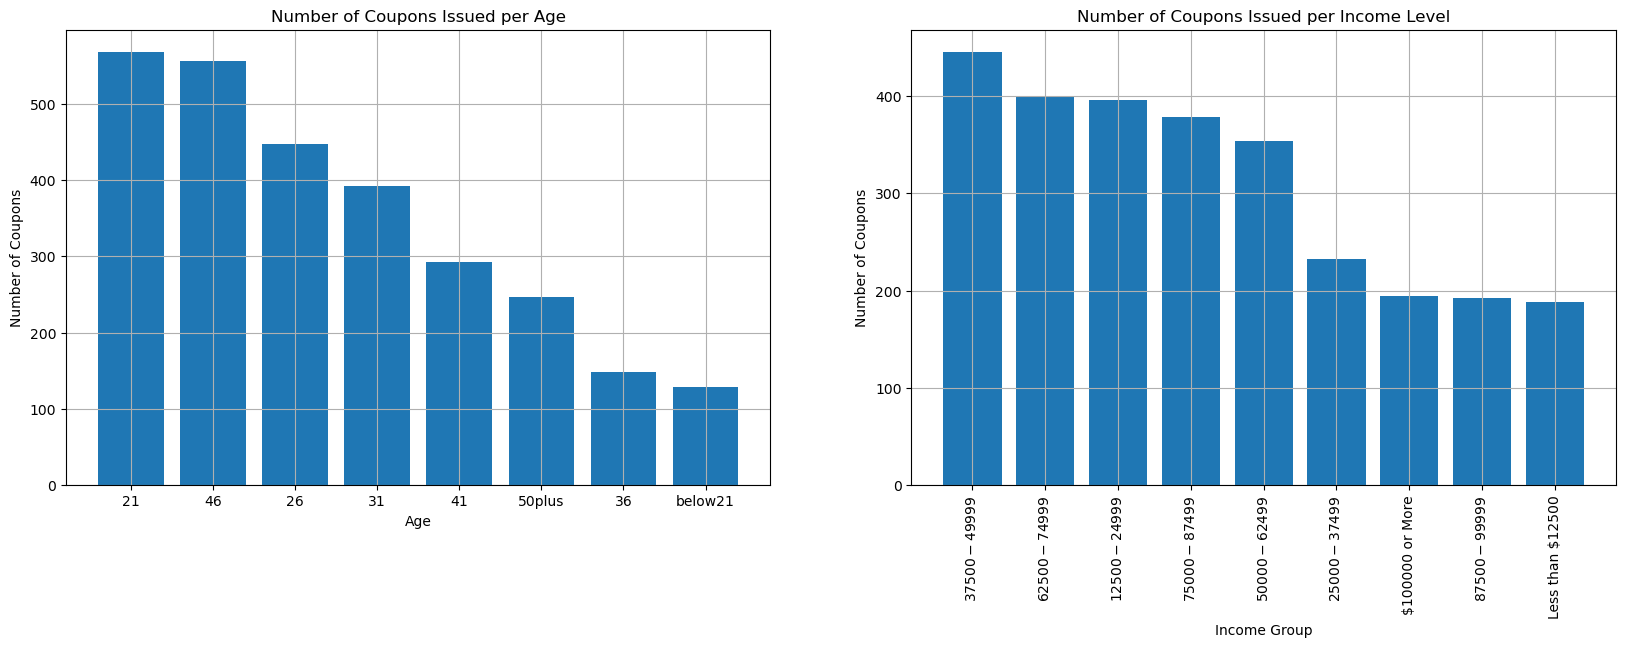

In [76]:
restaurantCoupons = data.loc[data['coupon'] == 'Restaurant(<20)']
ages = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

reload(plt)
fig = plt.figure(figsize=(20, 13))

plt.subplot(2, 2, 1)
plt.bar(restaurantCoupons['age'].unique(), restaurantCoupons["age"].value_counts().values)
plt.grid(True)
plt.title("Number of Coupons Issued per Age")
plt.xlabel("Age")
plt.ylabel("Number of Coupons")


plt.subplot(2, 2, 2)
plt.bar(restaurantCoupons['income'].unique(), restaurantCoupons["income"].value_counts().values)
plt.xticks(rotation=90)
plt.grid(True)
plt.title("Number of Coupons Issued per Income Level")
plt.xlabel("Income Group")
plt.ylabel("Number of Coupons")

fig.savefig("images/Coupons Issued Per Age and Income Level.png")

2. Lets look at the relationships between age and coupons accepted. 

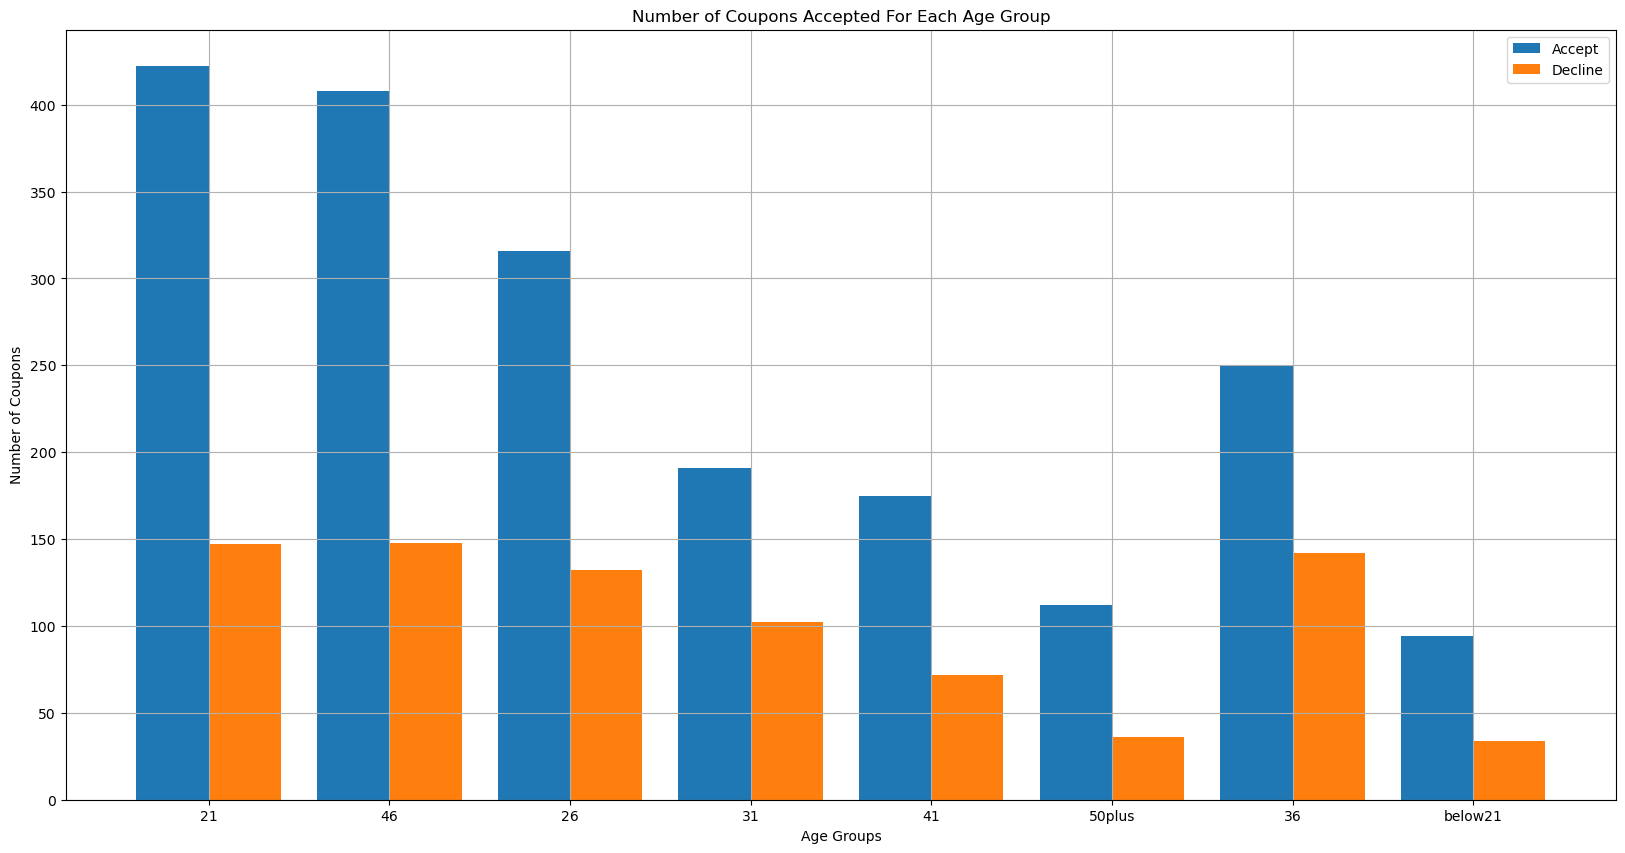

In [77]:
ageData = restaurantCoupons.groupby('age')['Y'].value_counts()
ages = restaurantCoupons['age'].unique()
yAccept = ageData.values[::2]
zDecline = ageData.values[1::2]

X_axis = np.arange(len(ages)) 

fig = plt.figure(figsize=(20, 10))

reload(plt)
plt.bar(X_axis - 0.2, yAccept, 0.4, label = 'Accept') 
plt.bar(X_axis + 0.2, zDecline, 0.4, label = 'Decline') 
plt.grid(True)
plt.xticks(X_axis, ages) 
plt.xlabel("Age Groups") 
plt.ylabel("Number of Coupons") 
plt.title("Number of Coupons Accepted For Each Age Group")
plt.legend() 
plt.savefig("images/Number of Coupons Accepted for Each Age Group.png")


3. Let's use the same process to describe the relationship between Income Level and coupons accepted. 

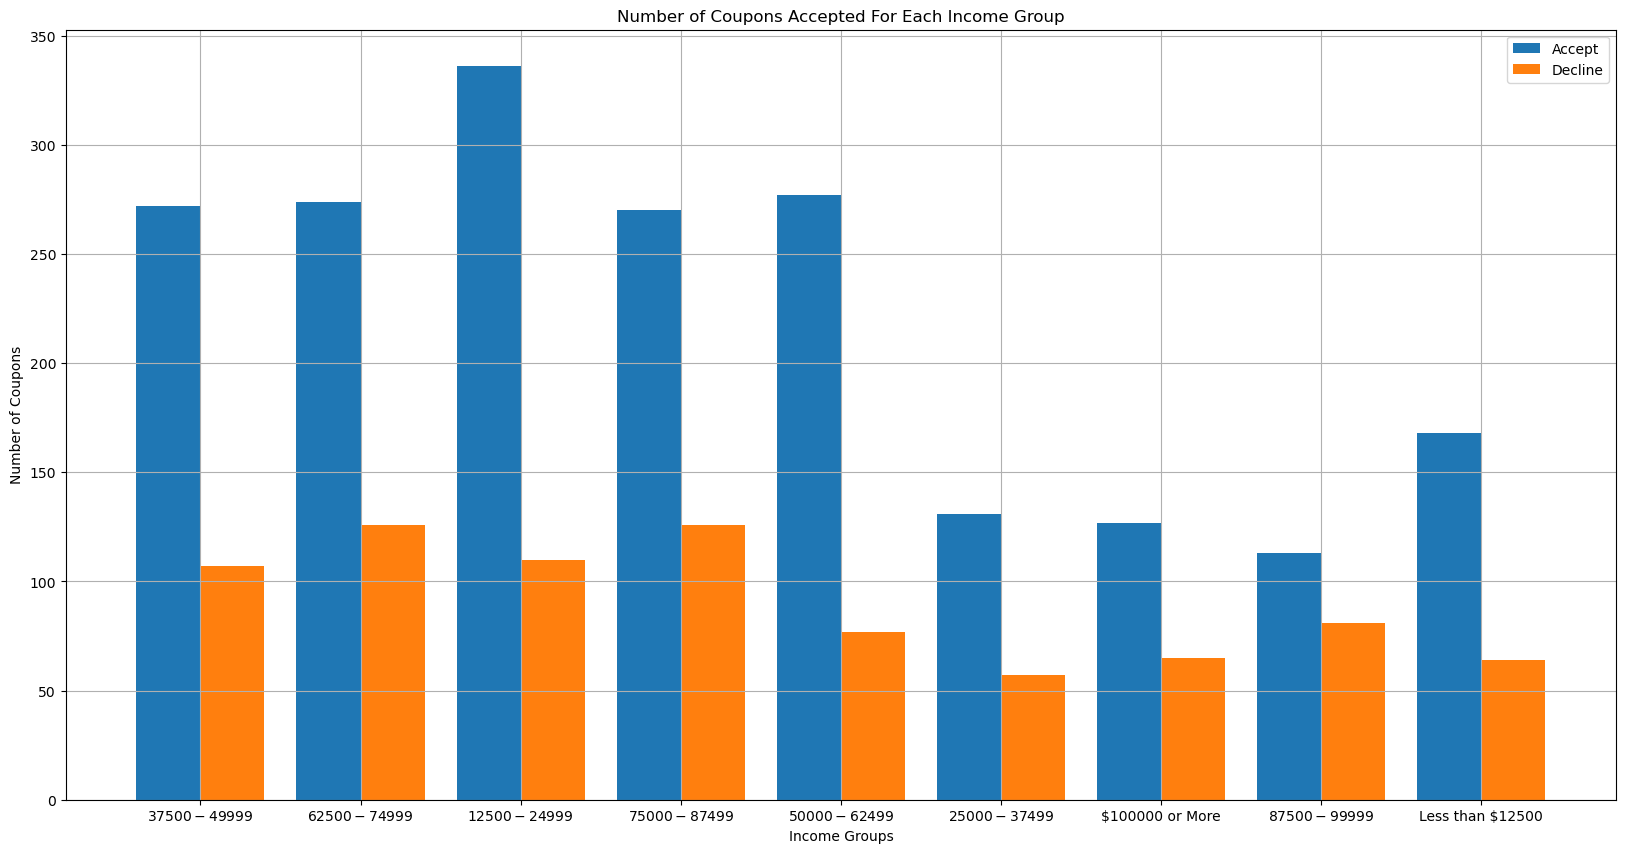

In [78]:
incomeData = restaurantCoupons.groupby('income')['Y'].value_counts()
incomes = restaurantCoupons['income'].unique()
yAccept = incomeData.values[::2]
zDecline = incomeData.values[1::2]

X_axis = np.arange(len(incomes)) 

fig = plt.figure(figsize=(20, 10))

plt.bar(X_axis - 0.2, yAccept, 0.4, label = 'Accept') 
plt.bar(X_axis + 0.2, zDecline, 0.4, label = 'Decline') 
plt.grid(True)
plt.xticks(X_axis, incomes) 
plt.xlabel("Income Groups") 
plt.ylabel("Number of Coupons") 
plt.title("Number of Coupons Accepted For Each Income Group")
# plt.xticks(rotation = 90)
plt.legend()
plt.savefig("images/Income Level vs Coupons Accepted.png")



4. Finally, let's look at the relationships between those who go to a cheap restaurant a certain number of times, and have children vs those who do not have children. 

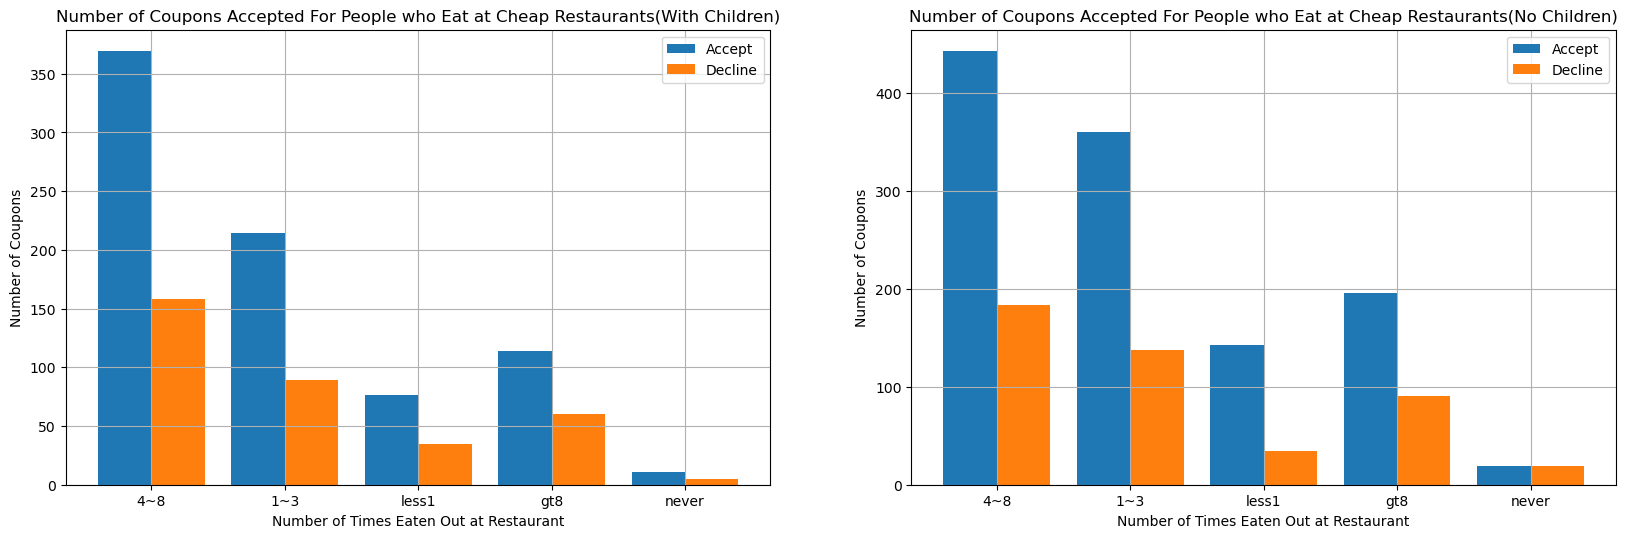

In [79]:
restaurantCouponsKids = restaurantCoupons.query('has_children == 1')
restaurantCouponsNoKids = restaurantCoupons.query('has_children == 0')
childrenData = restaurantCouponsKids.groupby('RestaurantLessThan20')['Y'].value_counts()
noChildrenData = restaurantCouponsNoKids.groupby('RestaurantLessThan20')['Y'].value_counts()
restaurantFrequency = ['4~8', '1~3', 'less1', 'gt8', 'never']
yAccept = childrenData.values[::2]
zDecline = childrenData.values[1::2]

X_axis = np.arange(len(restaurantFrequency)) 

reload(plt)
fig = plt.figure(figsize=(20, 13))

plt.subplot(2, 2, 1)  
plt.bar(X_axis - 0.2, yAccept, 0.4, label = 'Accept') 
plt.bar(X_axis + 0.2, zDecline, 0.4, label = 'Decline') 
plt.grid(True)
plt.xticks(X_axis, restaurantFrequency) 
plt.xlabel("Number of Times Eaten Out at Restaurant") 
plt.ylabel("Number of Coupons") 
plt.title("Number of Coupons Accepted For People who Eat at Cheap Restaurants(With Children)")
plt.legend() 

yAccept = noChildrenData.values[::2]
zDecline = noChildrenData.values[1::2]

plt.subplot(2, 2, 2)  
plt.bar(X_axis - 0.2, yAccept, 0.4, label = 'Accept') 
plt.bar(X_axis + 0.2, zDecline, 0.4, label = 'Decline') 
plt.grid(True)
plt.xticks(X_axis, restaurantFrequency) 
plt.xlabel("Number of Times Eaten Out at Restaurant") 
plt.ylabel("Number of Coupons") 
plt.title("Number of Coupons Accepted For People who Eat at Cheap Restaurants(No Children)")
plt.legend() 

fig.savefig("images/Number of Coupons Accepted (Children vs No Children).png")

5. What are your observations?
    1. Age Data contains 21 and 46 year olds being the biggest sample sizes. Income data shows a fairly normal distribution, with the greatest number of sampled individuals residing within the 37500 - 49999 income bracket. 
    2. As expected, we see the biggest acceptance ratio within the 21 year old age group, with the 26 year old age group following a similar trend. What is interesting is that there is a large acceptance ratio with the 46 year old age group as well, it's worth looking into other factors such as marital status and income level within that particular age group. 
    3. As expected, we see the biggest acceptance ratio within the 12500 - 24999 income group, with income groups up to 75000 dollars a year having similarly high acceptance rates. High income groups have an acceptance ratio of over 50 percent, but not as high as the lower to middle income groups.
    4. There isn't much of a difference or a trend with the acceptance ratios of those who have children vs. those who do not. I believe income and age play a greater role in determining acceptance ratios. 
    5. Interestingly, for folks eat out at a restaurant less than 1 time a month, the acceptance ratio is significantly higher with no children, compared to folks with children. 
